In [1]:
import pandas as pd
import numpy as np

# 特征最影响结果的K个特征
from sklearn.feature_selection import SelectKBest

# 卡方检验，作为SelectKBest的参数
from sklearn.feature_selection import chi2

In [7]:
data = pd.read_csv('./datas/titanic/titanic_train.csv')

In [15]:
data = data[["PassengerId", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].copy()
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [11]:
# 我们可以从上面看到，Age Embarked是有缺失的
data["Age"] = data["Age"].fillna(data["Age"].median()) # 给Age列填充平均值

In [17]:
data[data.isnull().values==True]  # 这是看具体缺失的行

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [18]:
data["Embarked"] = data["Embarked"].fillna(0)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# 数据转换

In [24]:
data.loc[data["Sex"] == "male", "Sex"] = 0
data.loc[data["Sex"] == "female", "Sex"] = 1
data.Embarked.unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [25]:
data.loc[data["Embarked"] == "S", "Embarked"] = 1
data.loc[data["Embarked"] == "C", "Embarked"] = 2
data.loc[data["Embarked"] == "Q", "Embarked"] = 3

In [29]:
Y = data.pop("Survived")
X = data

5、使用卡方检验选择topK的特征

In [33]:
# 选择所有的特征，目的是看到特征重要性排序
bestfeatures = SelectKBest(score_func=chi2, k=len(X.columns))
fit = bestfeatures.fit(X, Y)

In [34]:
df_scores = pd.DataFrame(fit.scores_)
df_scores

,0
0,3.312934
1,30.873699
2,170.348127
3,21.649163
4,2.581865
5,10.097499
6,4518.319091
7,2.771019


In [35]:
df_columns = pd.DataFrame(X.columns)
df_columns

,0
0,PassengerId
1,Pclass
2,Sex
3,Age
4,SibSp
5,Parch
6,Fare
7,Embarked


In [36]:
# 合并两个df
df_feature_scores = pd.concat([df_columns,df_scores],axis=1)
# 列名
df_feature_scores.columns = ['feature_name','Score']  #naming the dataframe columns

# 查看
df_feature_scores

,feature_name,Score
0,PassengerId,3.312934
1,Pclass,30.873699
2,Sex,170.348127
3,Age,21.649163
4,SibSp,2.581865
5,Parch,10.097499
6,Fare,4518.319091
7,Embarked,2.771019


In [37]:
df_feature_scores.sort_values(by="Score", ascending=False)

,feature_name,Score
6,Fare,4518.319091
2,Sex,170.348127
1,Pclass,30.873699
3,Age,21.649163
5,Parch,10.097499
0,PassengerId,3.312934
7,Embarked,2.771019
4,SibSp,2.581865


In [57]:
import torch
from torch import nn

In [72]:
# 我们选择前5个特征
data = X[['Fare', 'Sex', 'Pclass', 'Age', 'Parch']].astype(np.float32)
data.head()

,Fare,Sex,Pclass,Age,Parch
0,7.250000,0.0,3.0,22.0,0.0
1,71.283302,1.0,1.0,38.0,0.0
2,7.925000,1.0,3.0,26.0,0.0
3,53.099998,1.0,1.0,35.0,0.0
4,8.050000,0.0,3.0,35.0,0.0


In [86]:
X = torch.from_numpy(data.values).type(torch.float32)
Y = Y.type(torch.float32)

In [113]:
model = nn.Sequential(
    nn.Linear(5, 1),
    nn.Sigmoid()
 )
loss_fn = nn.BCELoss()
opt = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)


In [114]:
from torch.utils.data import TensorDataset,DataLoader
from sklearn.model_selection import train_test_split

In [115]:
train_x, test_x, train_y, test_y = train_test_split(X, Y)

train_ds = TensorDataset(train_x, train_y)
train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
test_ds = TensorDataset(test_x, test_y)
test_dl = DataLoader(test_ds, batch_size=16, shuffle=True)

In [116]:
acc_train_list = []
acc_test_list = []
loss_list = []
for epoch in range(3000):
    for x,y in train_dl:
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
    with torch.no_grad():    
        acc_train = ((model(train_x)> 0.5).type(torch.int32) == train_y).float().mean()
        acc_test = ((model(test_x)> 0.5).type(torch.int32) == test_y).float().mean()
        if epoch % 100 ==0:
            loss_list.append(round(loss.data.item(), 3))
            acc_train_list.append(round(acc_train.item(), 3))
            acc_train_list.append(round(acc_test.item(), 3))
        print("epoch: ", epoch, "loss: ", round(loss.data.item(), 3), "acc_train:", round(acc_train.item(), 3),"acc_test:", round(acc_test.item(), 3) )

epoch:  0 loss:  2.81 acc_train: 0.298 acc_test: 0.345
epoch:  1 loss:  0.828 acc_train: 0.66 acc_test: 0.641
epoch:  2 loss:  0.738 acc_train: 0.573 acc_test: 0.556
epoch:  3 loss:  1.331 acc_train: 0.621 acc_test: 0.623
epoch:  4 loss:  0.606 acc_train: 0.63 acc_test: 0.614
epoch:  5 loss:  0.622 acc_train: 0.597 acc_test: 0.587
epoch:  6 loss:  0.515 acc_train: 0.624 acc_test: 0.592
epoch:  7 loss:  0.595 acc_train: 0.576 acc_test: 0.552
epoch:  8 loss:  0.765 acc_train: 0.635 acc_test: 0.65
epoch:  9 loss:  0.586 acc_train: 0.644 acc_test: 0.637
epoch:  10 loss:  0.707 acc_train: 0.603 acc_test: 0.587
epoch:  11 loss:  0.701 acc_train: 0.626 acc_test: 0.587
epoch:  12 loss:  0.508 acc_train: 0.624 acc_test: 0.596
epoch:  13 loss:  0.542 acc_train: 0.615 acc_test: 0.583
epoch:  14 loss:  0.541 acc_train: 0.639 acc_test: 0.637
epoch:  15 loss:  0.66 acc_train: 0.635 acc_test: 0.637
epoch:  16 loss:  1.018 acc_train: 0.659 acc_test: 0.655
epoch:  17 loss:  0.605 acc_train: 0.633 acc_t

epoch:  154 loss:  0.478 acc_train: 0.701 acc_test: 0.677
epoch:  155 loss:  0.506 acc_train: 0.615 acc_test: 0.619
epoch:  156 loss:  0.524 acc_train: 0.708 acc_test: 0.646
epoch:  157 loss:  0.61 acc_train: 0.69 acc_test: 0.673
epoch:  158 loss:  0.633 acc_train: 0.71 acc_test: 0.646
epoch:  159 loss:  0.569 acc_train: 0.708 acc_test: 0.686
epoch:  160 loss:  0.501 acc_train: 0.701 acc_test: 0.686
epoch:  161 loss:  0.477 acc_train: 0.693 acc_test: 0.691
epoch:  162 loss:  0.73 acc_train: 0.695 acc_test: 0.673
epoch:  163 loss:  0.73 acc_train: 0.71 acc_test: 0.659
epoch:  164 loss:  0.521 acc_train: 0.692 acc_test: 0.695
epoch:  165 loss:  0.557 acc_train: 0.711 acc_test: 0.655
epoch:  166 loss:  0.911 acc_train: 0.711 acc_test: 0.646
epoch:  167 loss:  0.659 acc_train: 0.704 acc_test: 0.7
epoch:  168 loss:  0.564 acc_train: 0.711 acc_test: 0.659
epoch:  169 loss:  0.611 acc_train: 0.651 acc_test: 0.668
epoch:  170 loss:  0.491 acc_train: 0.708 acc_test: 0.659
epoch:  171 loss:  0.3

epoch:  297 loss:  0.434 acc_train: 0.726 acc_test: 0.726
epoch:  298 loss:  0.721 acc_train: 0.725 acc_test: 0.731
epoch:  299 loss:  0.582 acc_train: 0.729 acc_test: 0.726
epoch:  300 loss:  0.473 acc_train: 0.75 acc_test: 0.771
epoch:  301 loss:  0.492 acc_train: 0.735 acc_test: 0.735
epoch:  302 loss:  0.407 acc_train: 0.723 acc_test: 0.704
epoch:  303 loss:  0.59 acc_train: 0.719 acc_test: 0.717
epoch:  304 loss:  0.635 acc_train: 0.725 acc_test: 0.704
epoch:  305 loss:  0.361 acc_train: 0.74 acc_test: 0.744
epoch:  306 loss:  0.587 acc_train: 0.725 acc_test: 0.731
epoch:  307 loss:  0.541 acc_train: 0.711 acc_test: 0.713
epoch:  308 loss:  0.571 acc_train: 0.732 acc_test: 0.735
epoch:  309 loss:  0.633 acc_train: 0.737 acc_test: 0.744
epoch:  310 loss:  0.608 acc_train: 0.729 acc_test: 0.726
epoch:  311 loss:  0.494 acc_train: 0.717 acc_test: 0.717
epoch:  312 loss:  0.521 acc_train: 0.719 acc_test: 0.709
epoch:  313 loss:  0.509 acc_train: 0.741 acc_test: 0.753
epoch:  314 loss:

epoch:  448 loss:  0.813 acc_train: 0.753 acc_test: 0.744
epoch:  449 loss:  0.51 acc_train: 0.76 acc_test: 0.794
epoch:  450 loss:  0.469 acc_train: 0.757 acc_test: 0.789
epoch:  451 loss:  0.802 acc_train: 0.765 acc_test: 0.803
epoch:  452 loss:  0.431 acc_train: 0.766 acc_test: 0.794
epoch:  453 loss:  0.676 acc_train: 0.747 acc_test: 0.749
epoch:  454 loss:  0.424 acc_train: 0.669 acc_test: 0.677
epoch:  455 loss:  0.522 acc_train: 0.762 acc_test: 0.794
epoch:  456 loss:  0.603 acc_train: 0.747 acc_test: 0.762
epoch:  457 loss:  0.469 acc_train: 0.754 acc_test: 0.762
epoch:  458 loss:  0.556 acc_train: 0.756 acc_test: 0.78
epoch:  459 loss:  0.449 acc_train: 0.766 acc_test: 0.753
epoch:  460 loss:  0.543 acc_train: 0.763 acc_test: 0.789
epoch:  461 loss:  0.384 acc_train: 0.74 acc_test: 0.753
epoch:  462 loss:  0.47 acc_train: 0.765 acc_test: 0.767
epoch:  463 loss:  0.393 acc_train: 0.763 acc_test: 0.794
epoch:  464 loss:  0.467 acc_train: 0.756 acc_test: 0.794
epoch:  465 loss:  

epoch:  598 loss:  0.548 acc_train: 0.766 acc_test: 0.789
epoch:  599 loss:  0.638 acc_train: 0.775 acc_test: 0.798
epoch:  600 loss:  0.504 acc_train: 0.772 acc_test: 0.794
epoch:  601 loss:  0.393 acc_train: 0.774 acc_test: 0.758
epoch:  602 loss:  0.714 acc_train: 0.774 acc_test: 0.794
epoch:  603 loss:  0.673 acc_train: 0.772 acc_test: 0.753
epoch:  604 loss:  0.304 acc_train: 0.766 acc_test: 0.753
epoch:  605 loss:  0.415 acc_train: 0.771 acc_test: 0.758
epoch:  606 loss:  0.32 acc_train: 0.777 acc_test: 0.798
epoch:  607 loss:  0.56 acc_train: 0.778 acc_test: 0.794
epoch:  608 loss:  0.581 acc_train: 0.774 acc_test: 0.794
epoch:  609 loss:  0.776 acc_train: 0.781 acc_test: 0.744
epoch:  610 loss:  0.426 acc_train: 0.774 acc_test: 0.753
epoch:  611 loss:  0.55 acc_train: 0.763 acc_test: 0.744
epoch:  612 loss:  0.44 acc_train: 0.762 acc_test: 0.771
epoch:  613 loss:  0.452 acc_train: 0.772 acc_test: 0.758
epoch:  614 loss:  0.44 acc_train: 0.769 acc_test: 0.794
epoch:  615 loss:  

epoch:  744 loss:  0.616 acc_train: 0.79 acc_test: 0.803
epoch:  745 loss:  0.807 acc_train: 0.793 acc_test: 0.803
epoch:  746 loss:  0.572 acc_train: 0.777 acc_test: 0.798
epoch:  747 loss:  0.367 acc_train: 0.769 acc_test: 0.789
epoch:  748 loss:  0.498 acc_train: 0.781 acc_test: 0.803
epoch:  749 loss:  0.473 acc_train: 0.774 acc_test: 0.789
epoch:  750 loss:  0.298 acc_train: 0.775 acc_test: 0.798
epoch:  751 loss:  0.393 acc_train: 0.775 acc_test: 0.803
epoch:  752 loss:  0.526 acc_train: 0.783 acc_test: 0.807
epoch:  753 loss:  0.686 acc_train: 0.771 acc_test: 0.776
epoch:  754 loss:  0.654 acc_train: 0.777 acc_test: 0.798
epoch:  755 loss:  0.463 acc_train: 0.792 acc_test: 0.807
epoch:  756 loss:  0.585 acc_train: 0.777 acc_test: 0.803
epoch:  757 loss:  0.346 acc_train: 0.789 acc_test: 0.798
epoch:  758 loss:  0.412 acc_train: 0.774 acc_test: 0.794
epoch:  759 loss:  0.817 acc_train: 0.792 acc_test: 0.807
epoch:  760 loss:  0.682 acc_train: 0.784 acc_test: 0.794
epoch:  761 los

epoch:  893 loss:  0.477 acc_train: 0.79 acc_test: 0.807
epoch:  894 loss:  0.408 acc_train: 0.768 acc_test: 0.749
epoch:  895 loss:  0.516 acc_train: 0.786 acc_test: 0.803
epoch:  896 loss:  0.383 acc_train: 0.774 acc_test: 0.767
epoch:  897 loss:  0.508 acc_train: 0.789 acc_test: 0.798
epoch:  898 loss:  0.313 acc_train: 0.78 acc_test: 0.794
epoch:  899 loss:  0.642 acc_train: 0.784 acc_test: 0.803
epoch:  900 loss:  0.755 acc_train: 0.793 acc_test: 0.807
epoch:  901 loss:  0.516 acc_train: 0.789 acc_test: 0.807
epoch:  902 loss:  0.522 acc_train: 0.789 acc_test: 0.816
epoch:  903 loss:  0.754 acc_train: 0.792 acc_test: 0.807
epoch:  904 loss:  0.405 acc_train: 0.789 acc_test: 0.803
epoch:  905 loss:  0.41 acc_train: 0.783 acc_test: 0.794
epoch:  906 loss:  0.381 acc_train: 0.762 acc_test: 0.744
epoch:  907 loss:  0.428 acc_train: 0.792 acc_test: 0.812
epoch:  908 loss:  0.511 acc_train: 0.789 acc_test: 0.807
epoch:  909 loss:  0.423 acc_train: 0.789 acc_test: 0.798
epoch:  910 loss:

epoch:  1044 loss:  0.312 acc_train: 0.792 acc_test: 0.807
epoch:  1045 loss:  0.498 acc_train: 0.79 acc_test: 0.803
epoch:  1046 loss:  0.58 acc_train: 0.784 acc_test: 0.807
epoch:  1047 loss:  0.394 acc_train: 0.786 acc_test: 0.807
epoch:  1048 loss:  0.557 acc_train: 0.786 acc_test: 0.803
epoch:  1049 loss:  0.613 acc_train: 0.799 acc_test: 0.807
epoch:  1050 loss:  0.39 acc_train: 0.787 acc_test: 0.803
epoch:  1051 loss:  0.552 acc_train: 0.786 acc_test: 0.807
epoch:  1052 loss:  0.431 acc_train: 0.778 acc_test: 0.789
epoch:  1053 loss:  0.416 acc_train: 0.799 acc_test: 0.807
epoch:  1054 loss:  0.555 acc_train: 0.787 acc_test: 0.798
epoch:  1055 loss:  0.375 acc_train: 0.787 acc_test: 0.798
epoch:  1056 loss:  0.967 acc_train: 0.772 acc_test: 0.771
epoch:  1057 loss:  0.465 acc_train: 0.793 acc_test: 0.812
epoch:  1058 loss:  0.474 acc_train: 0.792 acc_test: 0.807
epoch:  1059 loss:  0.563 acc_train: 0.787 acc_test: 0.803
epoch:  1060 loss:  0.481 acc_train: 0.778 acc_test: 0.794


epoch:  1186 loss:  0.429 acc_train: 0.787 acc_test: 0.807
epoch:  1187 loss:  0.318 acc_train: 0.789 acc_test: 0.803
epoch:  1188 loss:  0.292 acc_train: 0.783 acc_test: 0.78
epoch:  1189 loss:  0.724 acc_train: 0.79 acc_test: 0.807
epoch:  1190 loss:  0.35 acc_train: 0.769 acc_test: 0.749
epoch:  1191 loss:  0.398 acc_train: 0.772 acc_test: 0.771
epoch:  1192 loss:  0.502 acc_train: 0.784 acc_test: 0.803
epoch:  1193 loss:  0.334 acc_train: 0.777 acc_test: 0.785
epoch:  1194 loss:  0.313 acc_train: 0.783 acc_test: 0.776
epoch:  1195 loss:  0.386 acc_train: 0.781 acc_test: 0.798
epoch:  1196 loss:  0.308 acc_train: 0.787 acc_test: 0.812
epoch:  1197 loss:  0.455 acc_train: 0.784 acc_test: 0.803
epoch:  1198 loss:  0.592 acc_train: 0.789 acc_test: 0.803
epoch:  1199 loss:  0.337 acc_train: 0.786 acc_test: 0.803
epoch:  1200 loss:  1.01 acc_train: 0.775 acc_test: 0.771
epoch:  1201 loss:  0.446 acc_train: 0.789 acc_test: 0.812
epoch:  1202 loss:  0.459 acc_train: 0.79 acc_test: 0.803
ep

epoch:  1328 loss:  0.239 acc_train: 0.789 acc_test: 0.803
epoch:  1329 loss:  0.577 acc_train: 0.774 acc_test: 0.749
epoch:  1330 loss:  0.77 acc_train: 0.786 acc_test: 0.807
epoch:  1331 loss:  0.237 acc_train: 0.772 acc_test: 0.758
epoch:  1332 loss:  0.635 acc_train: 0.786 acc_test: 0.807
epoch:  1333 loss:  0.422 acc_train: 0.787 acc_test: 0.803
epoch:  1334 loss:  0.882 acc_train: 0.792 acc_test: 0.812
epoch:  1335 loss:  0.608 acc_train: 0.786 acc_test: 0.803
epoch:  1336 loss:  0.588 acc_train: 0.789 acc_test: 0.816
epoch:  1337 loss:  0.368 acc_train: 0.789 acc_test: 0.803
epoch:  1338 loss:  0.639 acc_train: 0.784 acc_test: 0.803
epoch:  1339 loss:  0.501 acc_train: 0.793 acc_test: 0.816
epoch:  1340 loss:  0.674 acc_train: 0.79 acc_test: 0.803
epoch:  1341 loss:  0.613 acc_train: 0.787 acc_test: 0.816
epoch:  1342 loss:  0.336 acc_train: 0.78 acc_test: 0.767
epoch:  1343 loss:  0.399 acc_train: 0.786 acc_test: 0.803
epoch:  1344 loss:  0.452 acc_train: 0.786 acc_test: 0.807


epoch:  1470 loss:  0.477 acc_train: 0.783 acc_test: 0.807
epoch:  1471 loss:  0.484 acc_train: 0.787 acc_test: 0.807
epoch:  1472 loss:  0.282 acc_train: 0.781 acc_test: 0.798
epoch:  1473 loss:  0.287 acc_train: 0.787 acc_test: 0.812
epoch:  1474 loss:  0.364 acc_train: 0.783 acc_test: 0.798
epoch:  1475 loss:  0.342 acc_train: 0.786 acc_test: 0.803
epoch:  1476 loss:  0.434 acc_train: 0.786 acc_test: 0.807
epoch:  1477 loss:  0.506 acc_train: 0.789 acc_test: 0.812
epoch:  1478 loss:  0.353 acc_train: 0.798 acc_test: 0.812
epoch:  1479 loss:  0.401 acc_train: 0.786 acc_test: 0.803
epoch:  1480 loss:  0.676 acc_train: 0.786 acc_test: 0.812
epoch:  1481 loss:  0.219 acc_train: 0.784 acc_test: 0.807
epoch:  1482 loss:  0.459 acc_train: 0.786 acc_test: 0.807
epoch:  1483 loss:  0.313 acc_train: 0.792 acc_test: 0.807
epoch:  1484 loss:  0.654 acc_train: 0.783 acc_test: 0.803
epoch:  1485 loss:  0.462 acc_train: 0.784 acc_test: 0.798
epoch:  1486 loss:  0.64 acc_train: 0.793 acc_test: 0.81

epoch:  1611 loss:  0.398 acc_train: 0.792 acc_test: 0.807
epoch:  1612 loss:  0.511 acc_train: 0.784 acc_test: 0.807
epoch:  1613 loss:  0.624 acc_train: 0.795 acc_test: 0.794
epoch:  1614 loss:  0.399 acc_train: 0.784 acc_test: 0.807
epoch:  1615 loss:  0.389 acc_train: 0.792 acc_test: 0.812
epoch:  1616 loss:  0.466 acc_train: 0.792 acc_test: 0.807
epoch:  1617 loss:  0.407 acc_train: 0.79 acc_test: 0.816
epoch:  1618 loss:  0.688 acc_train: 0.783 acc_test: 0.776
epoch:  1619 loss:  0.331 acc_train: 0.787 acc_test: 0.803
epoch:  1620 loss:  0.506 acc_train: 0.784 acc_test: 0.807
epoch:  1621 loss:  0.614 acc_train: 0.79 acc_test: 0.803
epoch:  1622 loss:  0.388 acc_train: 0.783 acc_test: 0.807
epoch:  1623 loss:  0.376 acc_train: 0.784 acc_test: 0.807
epoch:  1624 loss:  0.131 acc_train: 0.787 acc_test: 0.816
epoch:  1625 loss:  0.398 acc_train: 0.783 acc_test: 0.798
epoch:  1626 loss:  0.245 acc_train: 0.789 acc_test: 0.798
epoch:  1627 loss:  0.268 acc_train: 0.796 acc_test: 0.812

epoch:  1752 loss:  0.287 acc_train: 0.766 acc_test: 0.753
epoch:  1753 loss:  0.177 acc_train: 0.787 acc_test: 0.812
epoch:  1754 loss:  0.267 acc_train: 0.792 acc_test: 0.812
epoch:  1755 loss:  0.748 acc_train: 0.792 acc_test: 0.807
epoch:  1756 loss:  0.426 acc_train: 0.775 acc_test: 0.767
epoch:  1757 loss:  0.25 acc_train: 0.783 acc_test: 0.798
epoch:  1758 loss:  0.376 acc_train: 0.786 acc_test: 0.807
epoch:  1759 loss:  0.505 acc_train: 0.784 acc_test: 0.803
epoch:  1760 loss:  0.517 acc_train: 0.784 acc_test: 0.803
epoch:  1761 loss:  0.244 acc_train: 0.784 acc_test: 0.803
epoch:  1762 loss:  0.588 acc_train: 0.795 acc_test: 0.816
epoch:  1763 loss:  0.481 acc_train: 0.783 acc_test: 0.785
epoch:  1764 loss:  0.462 acc_train: 0.786 acc_test: 0.798
epoch:  1765 loss:  0.304 acc_train: 0.781 acc_test: 0.798
epoch:  1766 loss:  0.604 acc_train: 0.789 acc_test: 0.803
epoch:  1767 loss:  0.492 acc_train: 0.783 acc_test: 0.798
epoch:  1768 loss:  0.385 acc_train: 0.783 acc_test: 0.79

epoch:  1899 loss:  0.661 acc_train: 0.783 acc_test: 0.798
epoch:  1900 loss:  0.723 acc_train: 0.786 acc_test: 0.807
epoch:  1901 loss:  0.462 acc_train: 0.781 acc_test: 0.803
epoch:  1902 loss:  0.238 acc_train: 0.787 acc_test: 0.803
epoch:  1903 loss:  0.758 acc_train: 0.778 acc_test: 0.789
epoch:  1904 loss:  0.336 acc_train: 0.783 acc_test: 0.798
epoch:  1905 loss:  0.531 acc_train: 0.772 acc_test: 0.767
epoch:  1906 loss:  0.294 acc_train: 0.796 acc_test: 0.807
epoch:  1907 loss:  0.524 acc_train: 0.786 acc_test: 0.807
epoch:  1908 loss:  0.401 acc_train: 0.783 acc_test: 0.807
epoch:  1909 loss:  0.337 acc_train: 0.783 acc_test: 0.807
epoch:  1910 loss:  0.45 acc_train: 0.79 acc_test: 0.816
epoch:  1911 loss:  0.397 acc_train: 0.784 acc_test: 0.798
epoch:  1912 loss:  0.592 acc_train: 0.783 acc_test: 0.807
epoch:  1913 loss:  0.36 acc_train: 0.777 acc_test: 0.753
epoch:  1914 loss:  0.248 acc_train: 0.781 acc_test: 0.798
epoch:  1915 loss:  0.641 acc_train: 0.783 acc_test: 0.807


epoch:  2042 loss:  0.32 acc_train: 0.783 acc_test: 0.807
epoch:  2043 loss:  0.342 acc_train: 0.784 acc_test: 0.803
epoch:  2044 loss:  0.64 acc_train: 0.787 acc_test: 0.803
epoch:  2045 loss:  0.803 acc_train: 0.784 acc_test: 0.807
epoch:  2046 loss:  0.449 acc_train: 0.787 acc_test: 0.807
epoch:  2047 loss:  0.536 acc_train: 0.786 acc_test: 0.812
epoch:  2048 loss:  0.402 acc_train: 0.798 acc_test: 0.812
epoch:  2049 loss:  0.616 acc_train: 0.796 acc_test: 0.803
epoch:  2050 loss:  0.365 acc_train: 0.771 acc_test: 0.749
epoch:  2051 loss:  0.819 acc_train: 0.787 acc_test: 0.803
epoch:  2052 loss:  0.194 acc_train: 0.777 acc_test: 0.758
epoch:  2053 loss:  0.604 acc_train: 0.795 acc_test: 0.816
epoch:  2054 loss:  0.418 acc_train: 0.786 acc_test: 0.807
epoch:  2055 loss:  0.589 acc_train: 0.784 acc_test: 0.803
epoch:  2056 loss:  0.59 acc_train: 0.778 acc_test: 0.785
epoch:  2057 loss:  0.433 acc_train: 0.787 acc_test: 0.803
epoch:  2058 loss:  0.338 acc_train: 0.777 acc_test: 0.753


epoch:  2186 loss:  0.335 acc_train: 0.784 acc_test: 0.807
epoch:  2187 loss:  0.406 acc_train: 0.787 acc_test: 0.807
epoch:  2188 loss:  0.586 acc_train: 0.786 acc_test: 0.803
epoch:  2189 loss:  0.316 acc_train: 0.774 acc_test: 0.758
epoch:  2190 loss:  0.608 acc_train: 0.784 acc_test: 0.803
epoch:  2191 loss:  0.333 acc_train: 0.792 acc_test: 0.807
epoch:  2192 loss:  0.308 acc_train: 0.784 acc_test: 0.803
epoch:  2193 loss:  0.226 acc_train: 0.783 acc_test: 0.803
epoch:  2194 loss:  0.566 acc_train: 0.769 acc_test: 0.758
epoch:  2195 loss:  0.692 acc_train: 0.784 acc_test: 0.812
epoch:  2196 loss:  0.509 acc_train: 0.792 acc_test: 0.816
epoch:  2197 loss:  0.541 acc_train: 0.786 acc_test: 0.807
epoch:  2198 loss:  0.3 acc_train: 0.786 acc_test: 0.812
epoch:  2199 loss:  0.383 acc_train: 0.783 acc_test: 0.807
epoch:  2200 loss:  0.281 acc_train: 0.784 acc_test: 0.807
epoch:  2201 loss:  0.415 acc_train: 0.792 acc_test: 0.812
epoch:  2202 loss:  0.612 acc_train: 0.786 acc_test: 0.803

epoch:  2330 loss:  0.301 acc_train: 0.786 acc_test: 0.807
epoch:  2331 loss:  0.501 acc_train: 0.789 acc_test: 0.798
epoch:  2332 loss:  0.189 acc_train: 0.792 acc_test: 0.812
epoch:  2333 loss:  0.496 acc_train: 0.786 acc_test: 0.803
epoch:  2334 loss:  0.478 acc_train: 0.786 acc_test: 0.807
epoch:  2335 loss:  0.392 acc_train: 0.772 acc_test: 0.762
epoch:  2336 loss:  0.661 acc_train: 0.789 acc_test: 0.803
epoch:  2337 loss:  0.504 acc_train: 0.777 acc_test: 0.776
epoch:  2338 loss:  0.738 acc_train: 0.793 acc_test: 0.816
epoch:  2339 loss:  0.435 acc_train: 0.778 acc_test: 0.771
epoch:  2340 loss:  0.481 acc_train: 0.79 acc_test: 0.807
epoch:  2341 loss:  0.459 acc_train: 0.796 acc_test: 0.807
epoch:  2342 loss:  0.579 acc_train: 0.783 acc_test: 0.807
epoch:  2343 loss:  0.433 acc_train: 0.786 acc_test: 0.803
epoch:  2344 loss:  0.569 acc_train: 0.79 acc_test: 0.807
epoch:  2345 loss:  0.916 acc_train: 0.781 acc_test: 0.794
epoch:  2346 loss:  0.217 acc_train: 0.783 acc_test: 0.807

epoch:  2480 loss:  0.36 acc_train: 0.787 acc_test: 0.803
epoch:  2481 loss:  0.42 acc_train: 0.775 acc_test: 0.767
epoch:  2482 loss:  0.487 acc_train: 0.798 acc_test: 0.816
epoch:  2483 loss:  0.555 acc_train: 0.792 acc_test: 0.812
epoch:  2484 loss:  0.305 acc_train: 0.777 acc_test: 0.78
epoch:  2485 loss:  0.363 acc_train: 0.786 acc_test: 0.807
epoch:  2486 loss:  0.556 acc_train: 0.79 acc_test: 0.807
epoch:  2487 loss:  0.481 acc_train: 0.786 acc_test: 0.798
epoch:  2488 loss:  0.453 acc_train: 0.789 acc_test: 0.803
epoch:  2489 loss:  0.313 acc_train: 0.792 acc_test: 0.812
epoch:  2490 loss:  0.31 acc_train: 0.787 acc_test: 0.803
epoch:  2491 loss:  0.633 acc_train: 0.787 acc_test: 0.803
epoch:  2492 loss:  0.414 acc_train: 0.781 acc_test: 0.803
epoch:  2493 loss:  0.689 acc_train: 0.787 acc_test: 0.807
epoch:  2494 loss:  0.354 acc_train: 0.784 acc_test: 0.803
epoch:  2495 loss:  0.351 acc_train: 0.784 acc_test: 0.798
epoch:  2496 loss:  0.499 acc_train: 0.78 acc_test: 0.785
epo

epoch:  2619 loss:  0.364 acc_train: 0.787 acc_test: 0.803
epoch:  2620 loss:  0.186 acc_train: 0.792 acc_test: 0.807
epoch:  2621 loss:  0.909 acc_train: 0.793 acc_test: 0.807
epoch:  2622 loss:  0.49 acc_train: 0.787 acc_test: 0.803
epoch:  2623 loss:  0.191 acc_train: 0.786 acc_test: 0.803
epoch:  2624 loss:  0.454 acc_train: 0.79 acc_test: 0.807
epoch:  2625 loss:  0.801 acc_train: 0.787 acc_test: 0.803
epoch:  2626 loss:  0.388 acc_train: 0.78 acc_test: 0.794
epoch:  2627 loss:  0.413 acc_train: 0.783 acc_test: 0.807
epoch:  2628 loss:  0.766 acc_train: 0.784 acc_test: 0.803
epoch:  2629 loss:  0.354 acc_train: 0.786 acc_test: 0.807
epoch:  2630 loss:  0.4 acc_train: 0.772 acc_test: 0.749
epoch:  2631 loss:  0.548 acc_train: 0.781 acc_test: 0.794
epoch:  2632 loss:  0.506 acc_train: 0.787 acc_test: 0.803
epoch:  2633 loss:  0.37 acc_train: 0.784 acc_test: 0.803
epoch:  2634 loss:  0.467 acc_train: 0.787 acc_test: 0.812
epoch:  2635 loss:  0.694 acc_train: 0.789 acc_test: 0.803
epo

epoch:  2759 loss:  0.737 acc_train: 0.781 acc_test: 0.803
epoch:  2760 loss:  0.671 acc_train: 0.784 acc_test: 0.807
epoch:  2761 loss:  0.477 acc_train: 0.787 acc_test: 0.807
epoch:  2762 loss:  0.254 acc_train: 0.787 acc_test: 0.807
epoch:  2763 loss:  0.254 acc_train: 0.781 acc_test: 0.794
epoch:  2764 loss:  0.391 acc_train: 0.786 acc_test: 0.812
epoch:  2765 loss:  0.486 acc_train: 0.786 acc_test: 0.803
epoch:  2766 loss:  0.489 acc_train: 0.792 acc_test: 0.812
epoch:  2767 loss:  0.686 acc_train: 0.789 acc_test: 0.807
epoch:  2768 loss:  0.616 acc_train: 0.789 acc_test: 0.803
epoch:  2769 loss:  0.365 acc_train: 0.783 acc_test: 0.803
epoch:  2770 loss:  0.524 acc_train: 0.786 acc_test: 0.807
epoch:  2771 loss:  0.219 acc_train: 0.786 acc_test: 0.807
epoch:  2772 loss:  0.455 acc_train: 0.786 acc_test: 0.803
epoch:  2773 loss:  0.385 acc_train: 0.78 acc_test: 0.789
epoch:  2774 loss:  0.249 acc_train: 0.789 acc_test: 0.816
epoch:  2775 loss:  0.544 acc_train: 0.784 acc_test: 0.80

epoch:  2901 loss:  0.423 acc_train: 0.787 acc_test: 0.798
epoch:  2902 loss:  0.391 acc_train: 0.789 acc_test: 0.807
epoch:  2903 loss:  0.263 acc_train: 0.784 acc_test: 0.803
epoch:  2904 loss:  0.382 acc_train: 0.78 acc_test: 0.798
epoch:  2905 loss:  0.389 acc_train: 0.789 acc_test: 0.807
epoch:  2906 loss:  0.601 acc_train: 0.786 acc_test: 0.803
epoch:  2907 loss:  0.903 acc_train: 0.792 acc_test: 0.807
epoch:  2908 loss:  0.612 acc_train: 0.781 acc_test: 0.803
epoch:  2909 loss:  0.67 acc_train: 0.787 acc_test: 0.807
epoch:  2910 loss:  0.795 acc_train: 0.778 acc_test: 0.794
epoch:  2911 loss:  0.367 acc_train: 0.777 acc_test: 0.758
epoch:  2912 loss:  0.493 acc_train: 0.784 acc_test: 0.803
epoch:  2913 loss:  0.805 acc_train: 0.789 acc_test: 0.807
epoch:  2914 loss:  0.286 acc_train: 0.786 acc_test: 0.803
epoch:  2915 loss:  0.686 acc_train: 0.78 acc_test: 0.794
epoch:  2916 loss:  0.67 acc_train: 0.796 acc_test: 0.816
epoch:  2917 loss:  0.408 acc_train: 0.786 acc_test: 0.803
e

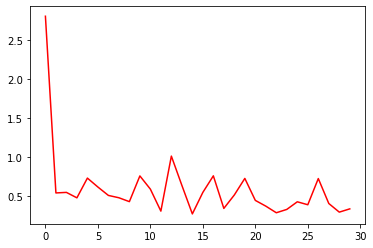

In [117]:
import matplotlib.pyplot as plt
plt.plot(loss_list,c='r')

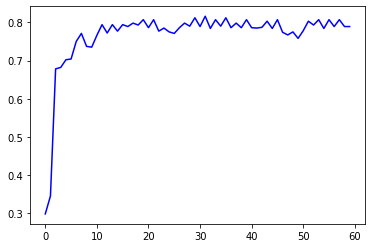

In [118]:
plt.plot(acc_train_list,c='b')